In [71]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#read csv file
df = pd.read_csv(r"C:\Users\Korisnik\Desktop\Data Analyst\london_merged.csv")

In [73]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [74]:
df.shape

(17414, 10)

In [75]:
new_col = {
    "timestamp" : "time",
    "cnt" : "count",
    "t1" : "temp_real_C",
    "t2" : "temp_feels_like_C",
    "hum" : "humidity_%",
    "wind_speed" : "wind_speed",
    "is_holiday" : "is_holiday",
    "is_weekend" : "is_weekend",
    "season" : "season"
}

df.rename(new_col, axis=1, inplace=True)

In [76]:
# Season
df['season'].replace(0, 'Spring', inplace=True)
df['season'].replace(1, 'Summer', inplace=True)
df['season'].replace(2, 'Fall', inplace=True)
df['season'].replace(3, 'Winter', inplace=True)

#Is Holiday
df['is_holiday'].replace(1, 'Holiday', inplace=True)
df['is_holiday'].replace(0, 'Non-holiday', inplace=True)

# Is weekend
df['is_weekend'].replace(1, 'Weekend', inplace=True)
df['is_weekend'].replace(0, 'Non-weekend', inplace=True)

#Weather Codes
df['weather_code'].replace(1, 'Clear', inplace=True)
df['weather_code'].replace(2, 'scattered clouds', inplace=True)
df['weather_code'].replace(3, 'Broken clouds', inplace=True)
df['weather_code'].replace(4, 'Cloudy', inplace=True)
df['weather_code'].replace(7, 'Rain', inplace=True)
df['weather_code'].replace(10, 'rain with thunderstorm', inplace=True)
df['weather_code'].replace(26, 'snowfall', inplace=True)
df['weather_code'].replace(94, 'Freezing Fog', inplace=True)
df.head(5)

,time,count,temp_real_C,temp_feels_like_C,humidity_%,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,Winter


In [77]:
df.to_excel("london_bikes_final.xlsx", sheet_name="Data")

In [78]:
df['date'] = pd.to_datetime(df['time']) 
df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df.head(2)

,time,count,temp_real_C,temp_feels_like_C,humidity_%,wind_speed,weather_code,is_holiday,is_weekend,season,date,day,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015-01-04 00:00:00,Sunday,January
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter,2015-01-04 01:00:00,Sunday,January


In [79]:
daily_bike_share  = (df.groupby('day')['count'].sum()/1000000).round(1)
daily_bike_share

day
Friday       2.9
Monday       2.8
Saturday     2.5
Sunday       2.4
Thursday     3.1
Tuesday      3.1
Wednesday    3.1
Name: count, dtype: float64

Text(0.5, 1.0, 'Daily Bike Sharing (Million)')

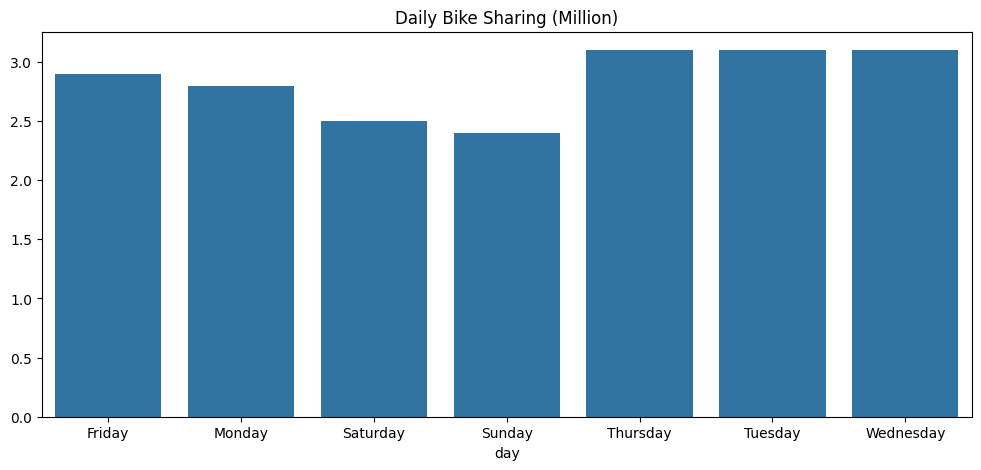

In [80]:
plt.figure(figsize=(12,5))

ax=sns.barplot(x=daily_bike_share.index, y=daily_bike_share.values)
ax.set_title("Daily Bike Sharing (Million)")

In [81]:
monthly_bike_share  = (df.groupby('month')['count'].sum()/1000000).round(1)
monthly_bike_share

month
April        1.6
August       2.2
December     1.3
February     1.1
January      1.2
July         2.3
June         2.0
March        1.4
May          1.9
November     1.4
October      1.8
September    1.9
Name: count, dtype: float64

Text(0.5, 1.0, 'Monthly Bike Sharing (Million)')

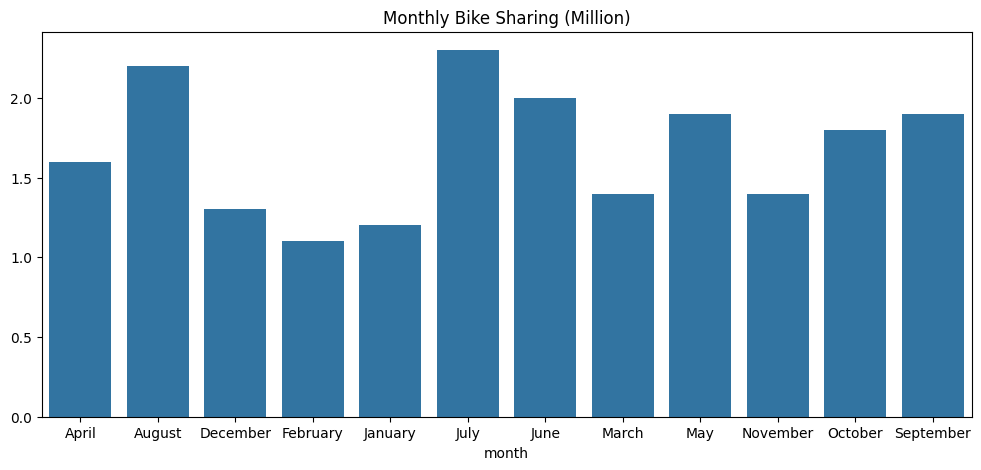

In [82]:
plt.figure(figsize=(12,5))

ax=sns.barplot(x=monthly_bike_share.index, y=monthly_bike_share.values)
ax.set_title("Monthly Bike Sharing (Million)")

In [83]:
seasonally_bike_share  = (df.groupby('season')['count'].sum()/1000000).round(1)
seasonally_bike_share

season
Fall      5.1
Spring    4.9
Summer    6.4
Winter    3.6
Name: count, dtype: float64

Text(0.5, 1.0, 'Seasonally Bike Sharing (Million)')

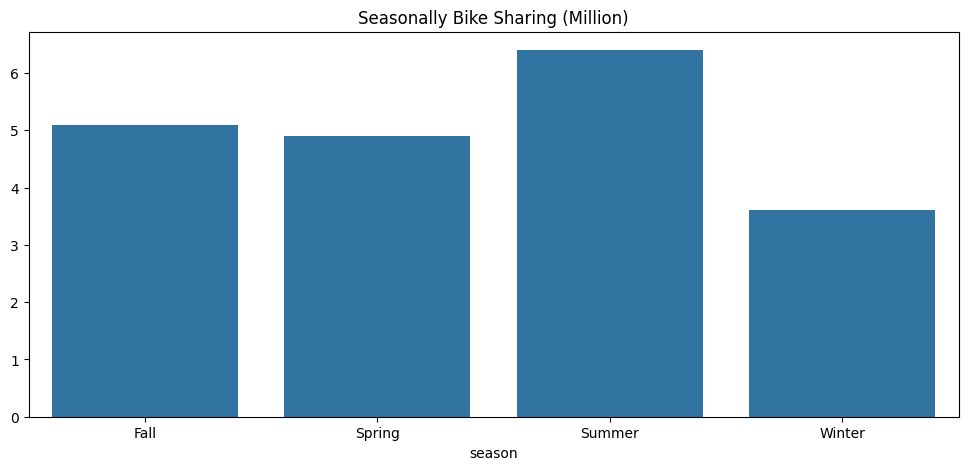

In [84]:
plt.figure(figsize=(12,5))

ax=sns.barplot(x=seasonally_bike_share.index, y=seasonally_bike_share.values)
ax.set_title("Seasonally Bike Sharing (Million)")



In [85]:
weather_bike_share  = (df.groupby('weather_code')['count'].sum()/1000000).round(1)
weather_bike_share

weather_code
Broken clouds             4.2
Clear                     7.1
Cloudy                    0.9
Rain                      1.5
rain with thunderstorm    0.0
scattered clouds          6.0
snowfall                  0.0
Name: count, dtype: float64

Text(0.5, 0, '')

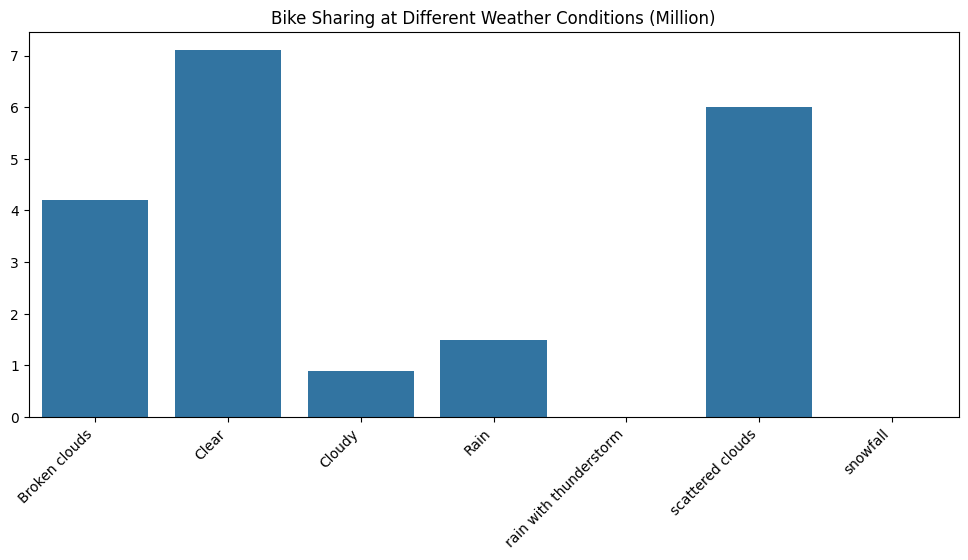

In [86]:
plt.figure(figsize=(12,5))

ax=sns.barplot(x=weather_bike_share.index, y=weather_bike_share.values)
ax.set_title("Bike Sharing at Different Weather Conditions (Million)")
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('')

In [87]:
weather_bike_share  = (df.groupby("is_holiday")['count'].sum()/1000000).round(1)
weather_bike_share

is_holiday
Holiday         0.3
Non-holiday    19.6
Name: count, dtype: float64

In [88]:
weekend_bike_share  = (df.groupby('is_weekend')['count'].sum()/1000000).round(1)
weekend_bike_share

is_weekend
Non-weekend    15.0
Weekend         4.9
Name: count, dtype: float64

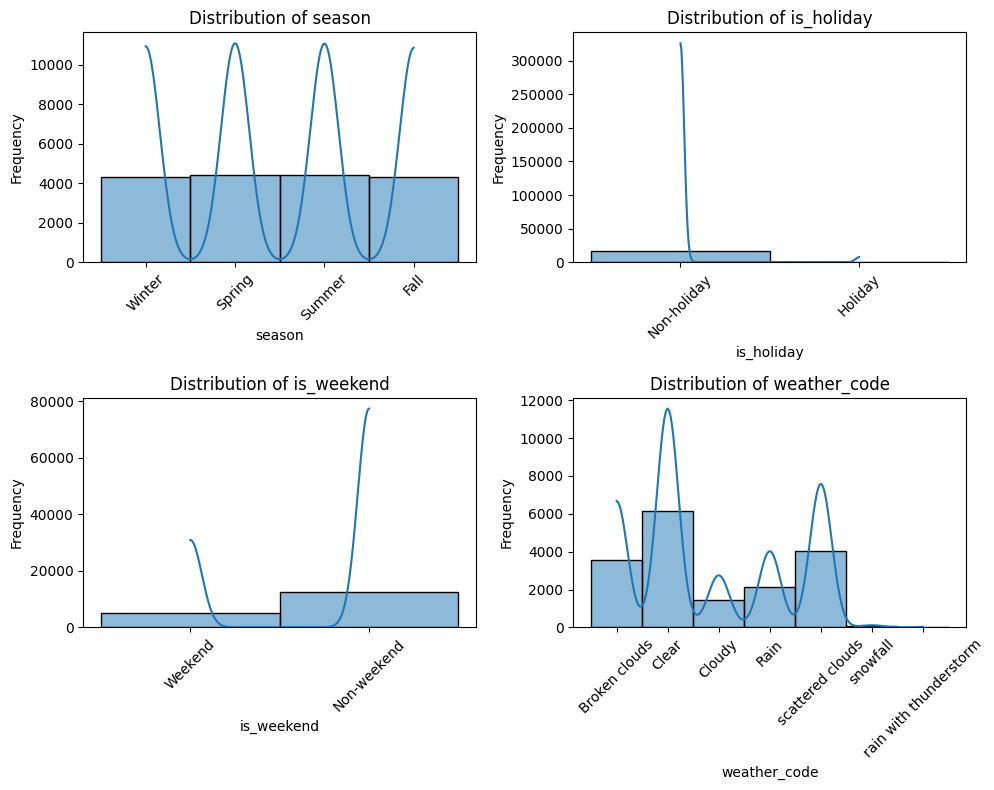

In [89]:
# For distribution analyses by OOM;

df_discrete = ["season", "is_holiday", "is_weekend", "weather_code"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
fig.tight_layout()

for i, ax in enumerate(axes.flat):
    feature = df_discrete[i]
    
    # Create a histogram for each feature
    sns.histplot(data=df, x=feature, kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of ' + feature)
    
    # If it is necessary; Rotate x-axis 
    ax.tick_params(axis='x', rotation=45)
    
fig.tight_layout()
plt.show()

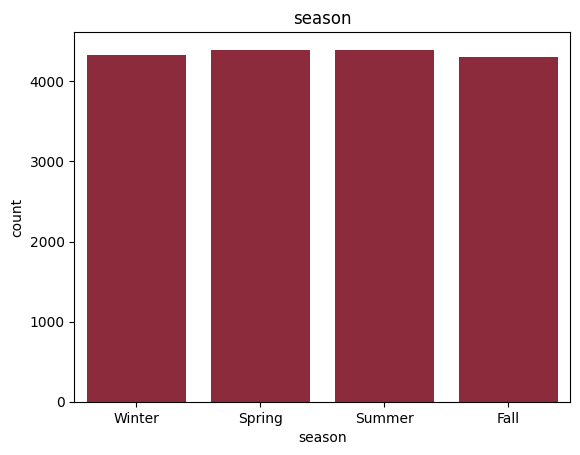

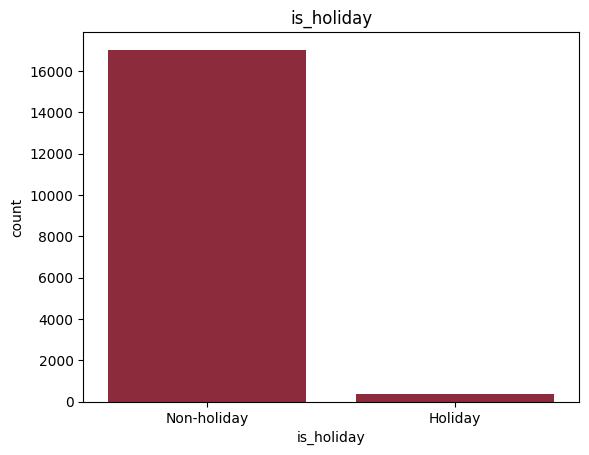

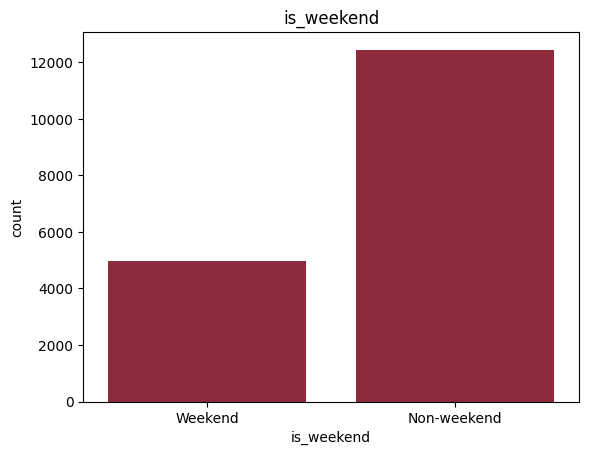

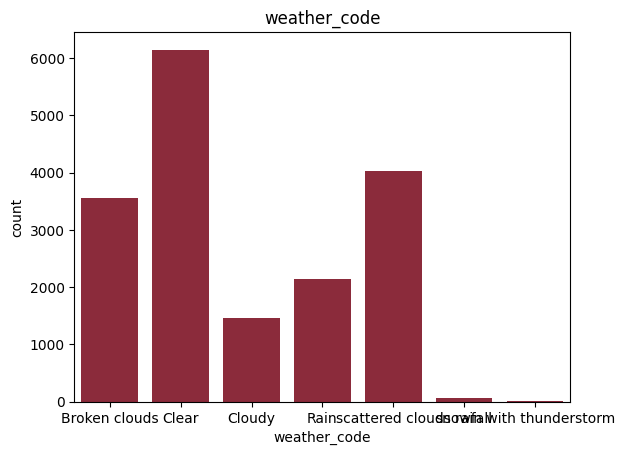

In [90]:
df_discrete = ["season", "is_holiday", "is_weekend", "weather_code"]

for i in df_discrete:
    sns.countplot(data=df, x=i, color="#9B1B30")
    plt.title(i)
    plt.show()


<Axes: title={'center': 'Bike Number'}, xlabel='count'>

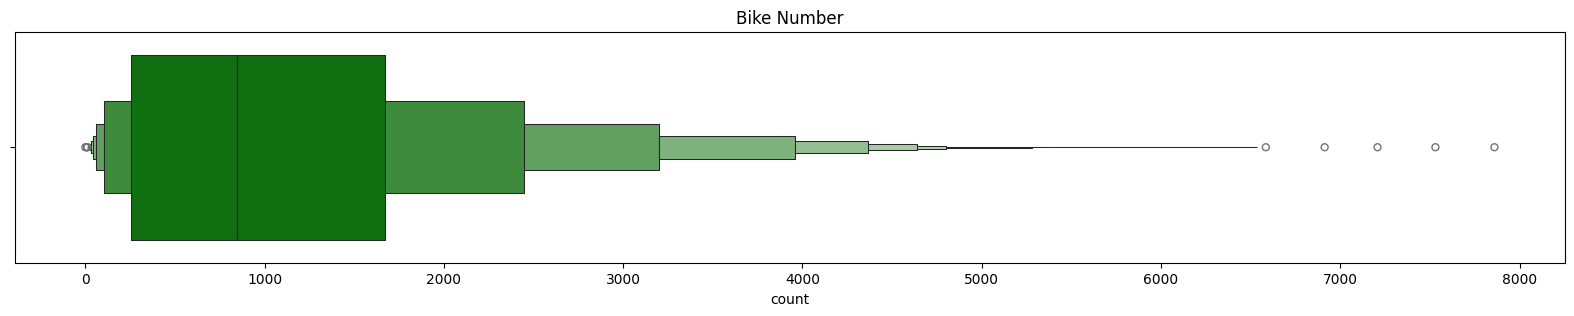

In [91]:
plt.figure(figsize=(20,3))
plt.title('Bike Number')
sns.boxenplot(x=df["count"], color='g')

<Axes: title={'center': 'Hummudity'}, xlabel='humidity_%'>

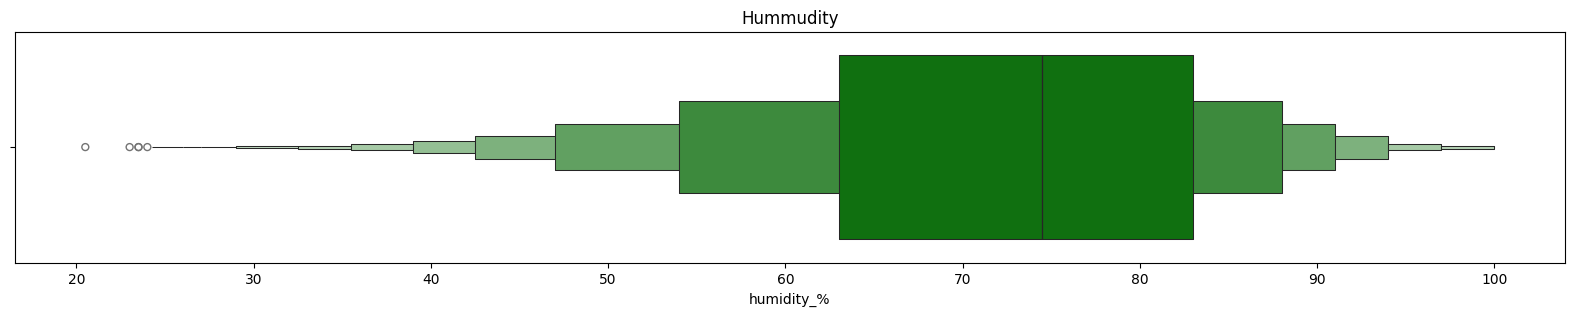

In [92]:
plt.figure(figsize=(20,3))
plt.title('Hummudity')
sns.boxenplot(x=df["humidity_%"], color='g')

<Axes: title={'center': 'Wind Speed'}, xlabel='wind_speed'>

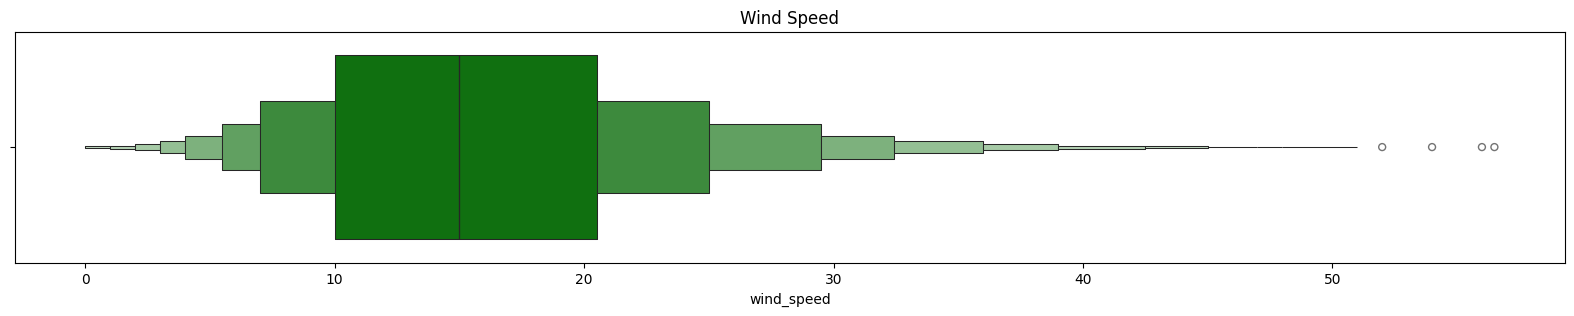

In [93]:
plt.figure(figsize=(20,3))
plt.title('Wind Speed')
sns.boxenplot(x=df["wind_speed"], color='g')

In [94]:
df['date'].dtypes 

dtype('<M8[ns]')

In [95]:
df = df.set_index(df['date'])
df["year"] = df.index.strftime("%Y")
df["year"]

date
2015-01-04 00:00:00    2015
2015-01-04 01:00:00    2015
2015-01-04 02:00:00    2015
2015-01-04 03:00:00    2015
2015-01-04 04:00:00    2015
                       ... 
2017-01-03 19:00:00    2017
2017-01-03 20:00:00    2017
2017-01-03 21:00:00    2017
2017-01-03 22:00:00    2017
2017-01-03 23:00:00    2017
Name: year, Length: 17414, dtype: object

<Axes: >

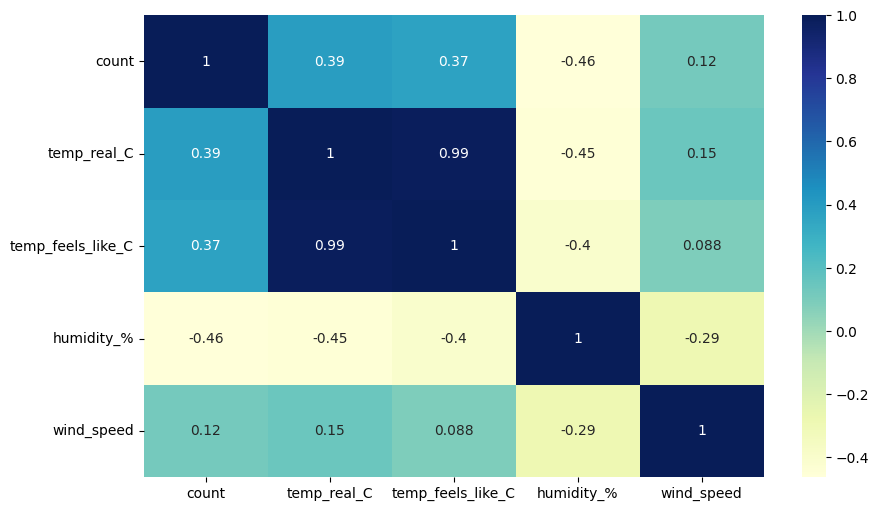

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes("number").corr(), cmap="YlGnBu", annot=True)

<Axes: >

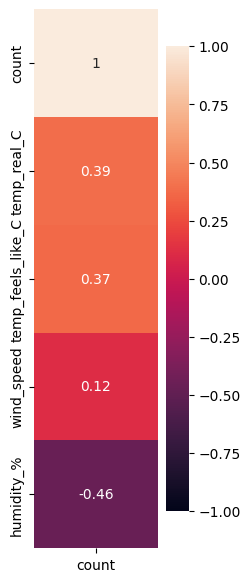

In [97]:
df_corr_cnt = df.select_dtypes("number").corr()[["count"]].sort_values(by="count", ascending=False)

plt.figure(figsize=(2,7))
sns.heatmap(df_corr_cnt, annot=True, vmin=-1, vmax=1)

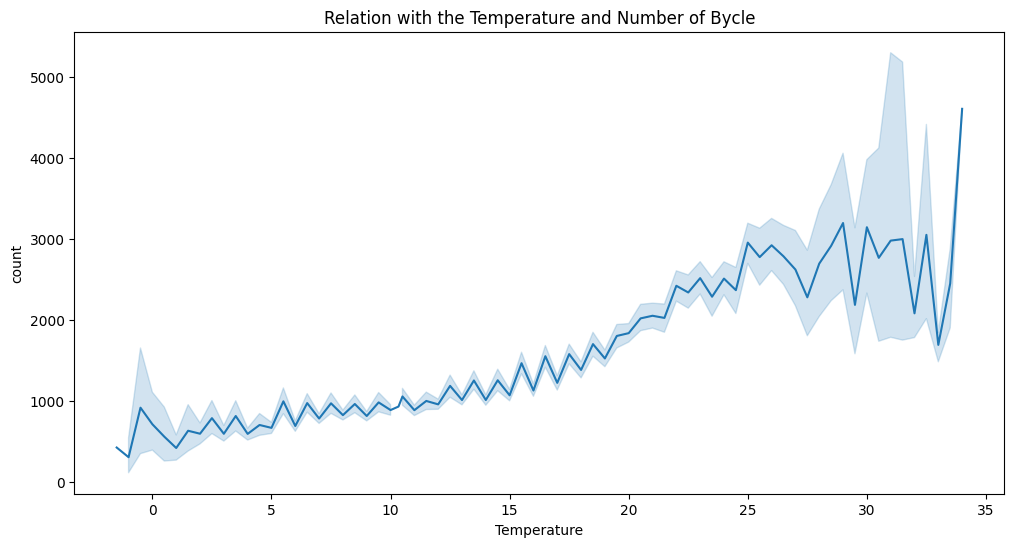

In [98]:
# Relation with the target variable and temperature with lineplot

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="temp_real_C", y="count")
plt.title("Relation with the Temperature and Number of Bycle")
plt.xlabel("Temperature")

plt.show()


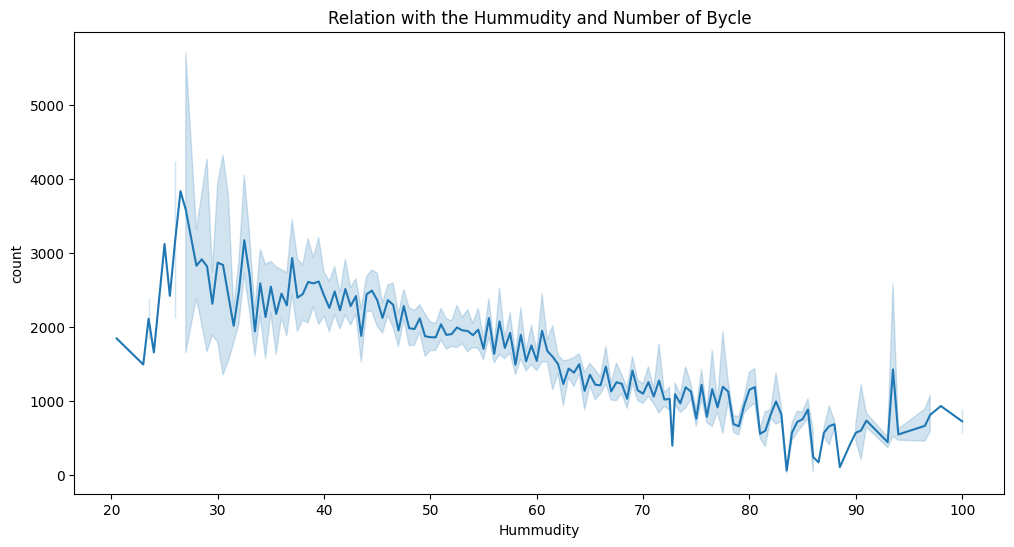

In [99]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="humidity_%", y="count")
plt.title("Relation with the Hummudity and Number of Bycle")
plt.xlabel("Hummudity")

plt.show()

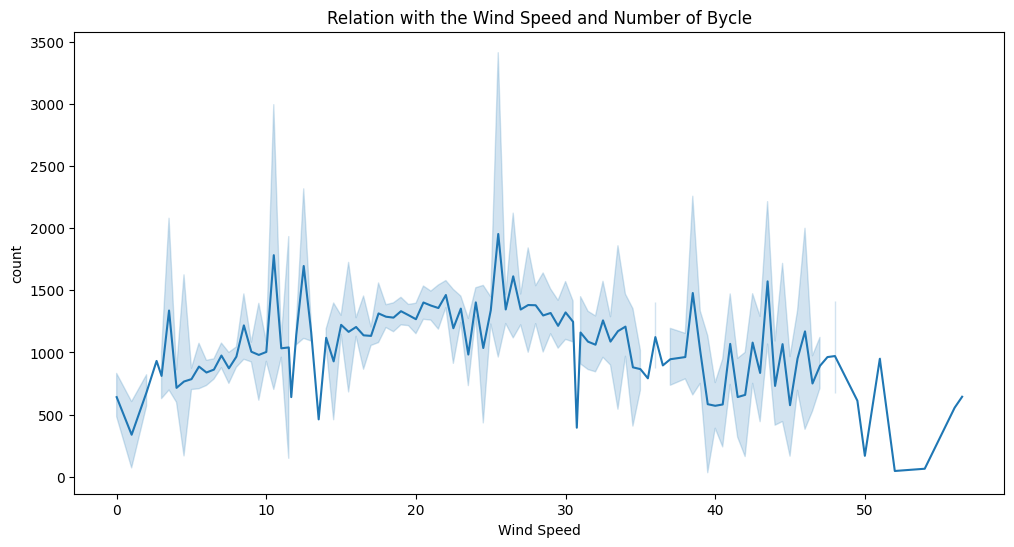

In [100]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="wind_speed", y="count")
plt.title("Relation with the Wind Speed and Number of Bycle")
plt.xlabel("Wind Speed")

plt.show()

In [101]:

df = df.set_index('date') 
df["year_month"] = df.index.strftime('%Y-%m')
df["year_month"]

date
2015-01-04 00:00:00    2015-01
2015-01-04 01:00:00    2015-01
2015-01-04 02:00:00    2015-01
2015-01-04 03:00:00    2015-01
2015-01-04 04:00:00    2015-01
                        ...   
2017-01-03 19:00:00    2017-01
2017-01-03 20:00:00    2017-01
2017-01-03 21:00:00    2017-01
2017-01-03 22:00:00    2017-01
2017-01-03 23:00:00    2017-01
Name: year_month, Length: 17414, dtype: object

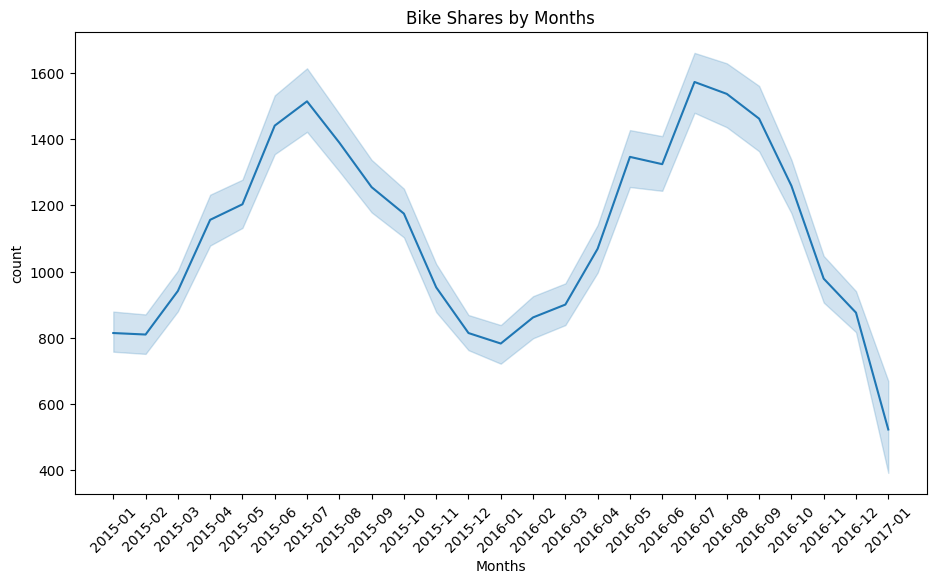

In [102]:
plt.figure(figsize=(11,6))

sns.lineplot(data=df, x="year_month", y="count")
plt.title("Bike Shares by Months")
plt.xlabel("Months")

plt.xticks(rotation=45)

plt.show()

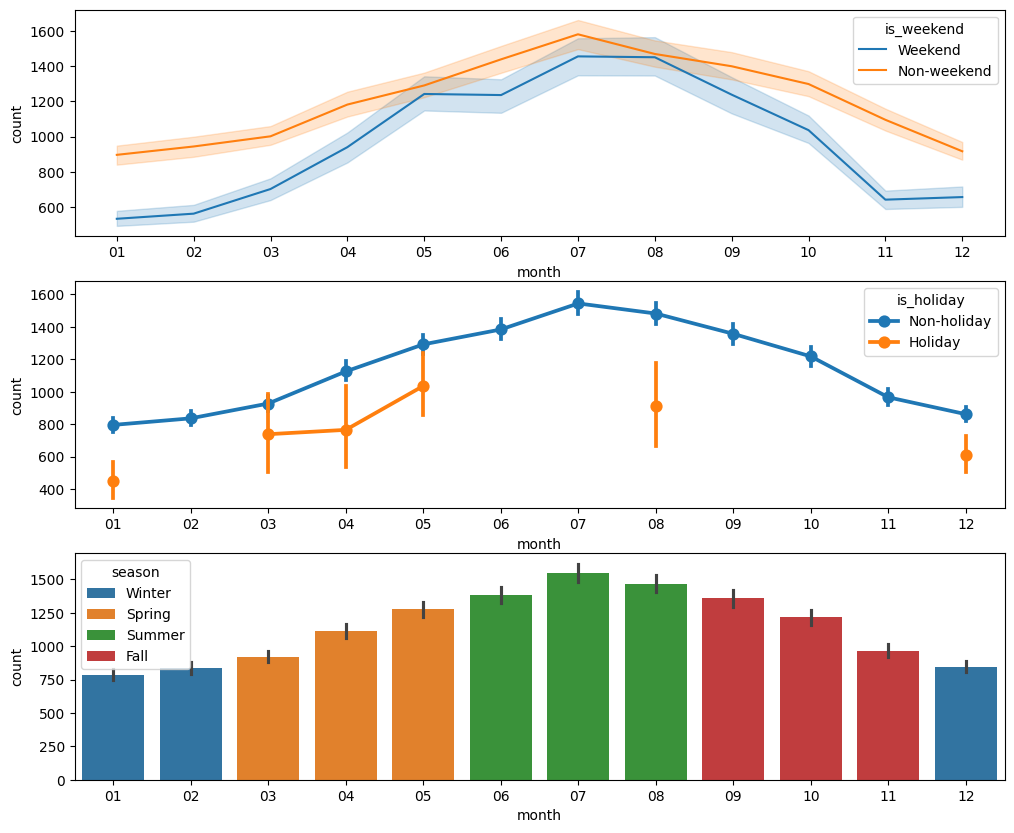

In [103]:
df["month"] = df.index.strftime('%m')
fig, ax = plt.subplots(3,1, figsize=(12,10))

sns.lineplot(data=df,  x = "month", y="count", ax =ax[0], hue = "is_weekend")
sns.pointplot(data=df, x = "month", y="count", ax =ax[1], hue = "is_holiday")
sns.barplot(data=df,   x = "month", y="count", ax =ax[2], hue = "season")

plt.show()

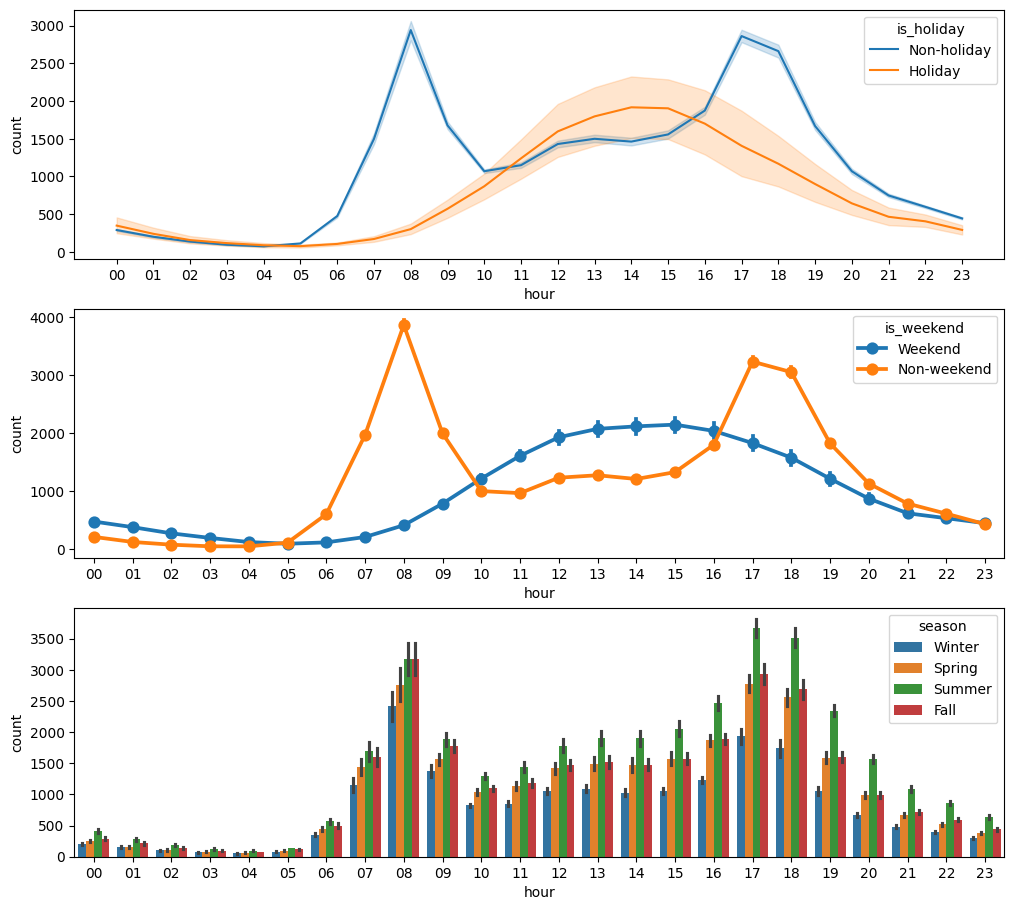

In [104]:
df["hour"] = df.index.strftime('%H')
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df,  x="hour", y="count", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="hour", y="count", hue="is_weekend", ax=ax[1])
sns.barplot(data=df,   x="hour", y="count", hue="season",     ax=ax[2])

plt.show()


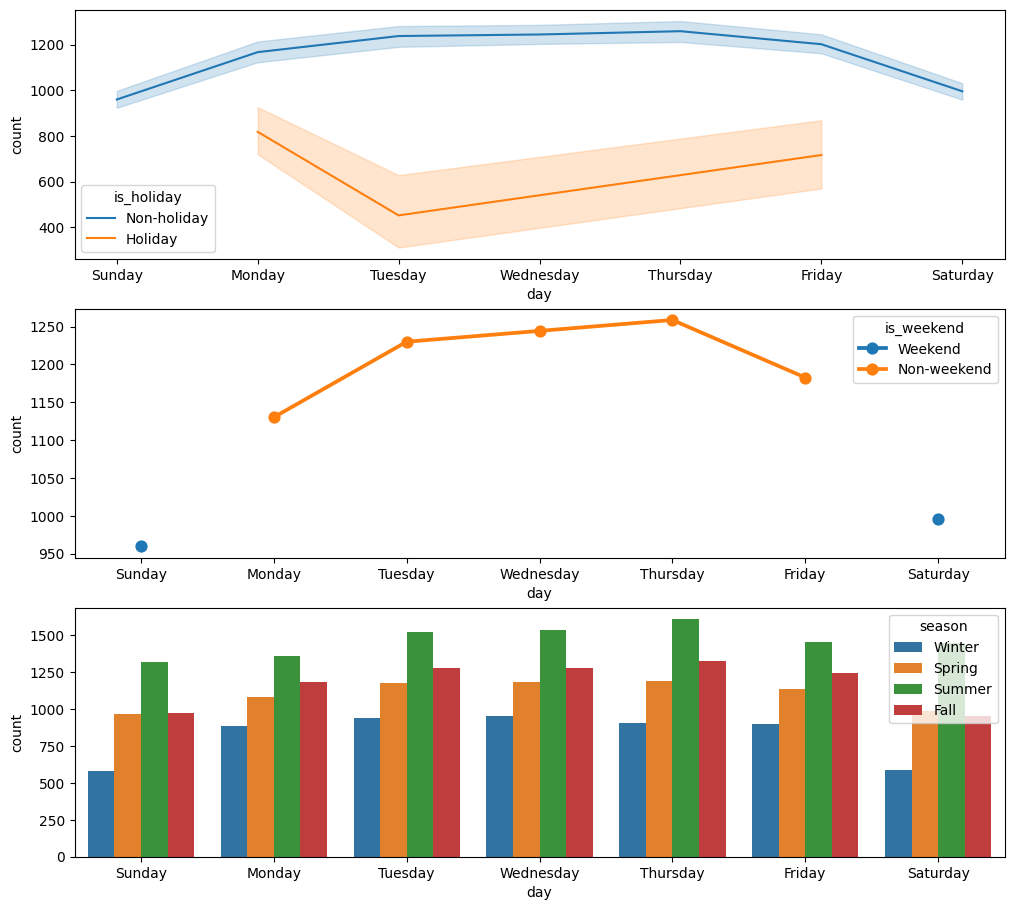

In [105]:
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df, x="day", y="count", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="day", y="count", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df, x="day", y="count", hue="season", ax=ax[2], errorbar=None)

plt.show()

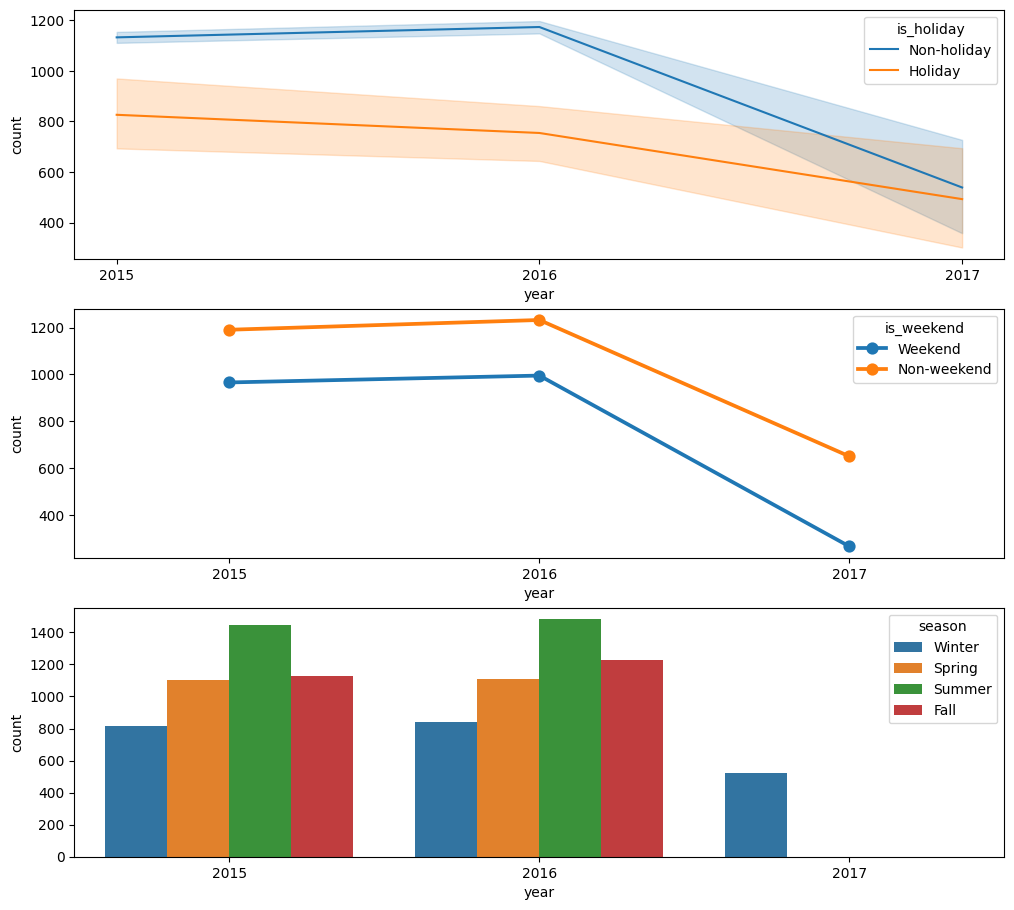

In [106]:
df["year"] = df.index.strftime('%Y')
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df,  x="year", y="count", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="year", y="count", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df,   x="year", y="count", hue="season",     ax=ax[2], errorbar=None)

plt.show()